In [1]:
!pip install ipywidgets > /dev/null

In [ ]:
!pip install matplotlib > /dev/null
!pip install scikit-learn > /dev/null

In [ ]:
!pip install joblib > /dev/null

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from numpy import mean

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, cross_val_score, cross_validate

from sklearn.metrics import precision_recall_curve, balanced_accuracy_score, precision_score, accuracy_score, recall_score, classification_report, PrecisionRecallDisplay, make_scorer, f1_score, average_precision_score
from sklearn.preprocessing import RobustScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import random

import shap
from lime import lime_tabular


In [2]:
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df = df.dropna()
df.isnull().sum().max()

0

In [4]:
fraud_percent      = df['Class'].value_counts()[0] / len(df) * 100
not_fraud_percent = df['Class'].value_counts()[1] / len(df) * 100

print("Porcentagem de transações fraudulentas %.2f"%fraud_percent)
print("Porcentagem de transações não fraudulentas %.2f"%not_fraud_percent)

Porcentagem de transações fraudulentas 99.83
Porcentagem de transações não fraudulentas 0.17


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
default_pos_color = "#008bfb"

In [7]:
data_dict = {
    'logistic_regression_values': [],
    'logistic_regression_lime': [], 
    'logistic_regression_shap': [],
    'random_forest_lime': [],
    'random_forest_shap': [],
    'svm_lime': [],
    'svm_shap': [],
    'mlp_classifier_lime': [],
    'mlp_classifier_shap': [],
    'decision_tree_lime': [],
    'decision_tree_shap': []
}

def save_model_data(model, data, method):
    if isinstance(model, LogisticRegression):
        if method == 'lime': 
            data_dict['logistic_regression_lime'].append(data)
        else:
            if method == 'shap':
                data_dict['logistic_regression_shap'].append(data)
            else:
                data_dict['logistic_regression_values'].append(data)
    elif isinstance(model, RandomForestClassifier):
        if method == 'lime': 
            data_dict['random_forest_lime'].append(data)
        else:
            data_dict['random_forest_shap'].append(data)
    elif isinstance(model, LinearSVC):
        if method == 'lime': 
            data_dict['svm_lime'].append(data)
        else:
            data_dict['svm_shap'].append(data)
    elif isinstance(model, MLPClassifier):
        if method == 'lime': 
            data_dict['mlp_classifier_lime'].append(data)
        else:
            data_dict['mlp_classifier_shap'].append(data)
    elif isinstance(model, DecisionTreeClassifier):
        if method == 'lime': 
            data_dict['decision_tree_lime'].append(data)
        else:
            data_dict['decision_tree_shap'].append(data)
    else:
        print("Unrecognized model type")

In [8]:
def normal_train (model_algorithm, X, y, shap_type='', pred=False):

    shap_explainers    = []
    lime_explainers    = []
    models             = []
    samples            = []
    
    precision_scores   = []
    f1_scores          = []
    balanced_acuracies = []
    sensitivity_scores = []
    specificity_scores = []
    auprc_scores       = []
    
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    
    for train_index, test_index in cv.split(X, y):

        if model_algorithm == 0:
            model = LogisticRegression(max_iter=2000, solver='newton-cholesky', random_state=1)
        elif model_algorithm == 1:
            model = DecisionTreeClassifier(random_state=1)
        elif model_algorithm == 2:
            model = RandomForestClassifier(max_depth=2, random_state=1)
        elif model_algorithm == 3:
            model = LinearSVC(max_iter=2000, dual=False, random_state=1)
        else:
            model =  MLPClassifier(random_state=1)
            
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train = X_train.copy()
        X_test  = X_test.copy()

        scaler = RobustScaler()
        X_train.loc[:, ['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
        X_test.loc[:, ['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])
        
        oversample = SMOTE(random_state=1)
        X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
        
        positive_samples_index = np.where(y_train == 1)[0]
        random_positive_sample_index = np.random.choice(positive_samples_index)
        random_positive_sample = X_train.iloc[random_positive_sample_index]
        samples.append(random_positive_sample)
        
        model.fit(X_train_smote, y_train_smote)
        models.append(model)

        #SHAP Stuff
        shapexplainer = shap.Explainer(model.predict, X_train_smote, seed=1)                    
        shap_explainers.append(shapexplainer)

        #LIME Stuff
        lime_explainer = lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_train_smote),
            feature_names=X_train_smote.columns,
            class_names=['legítima', 'fraude'],
            mode='classification',
            random_state=1
        )
        
        lime_explainers.append(lime_explainer)
        
        y_pred = model.predict(X_test)
        
        balanced_acuracies.append(balanced_accuracy_score(y_test, y_pred))
        sensitivity_scores.append(recall_score(y_test, y_pred))
        specificity_scores.append(recall_score(y_test, y_pred, pos_label=0))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auprc_scores.append(average_precision_score(y_test, y_pred))
     
    
    return {
        'shap_explainers'    : shap_explainers,
        'lime_explainers'    : lime_explainers,
        'models'             : models,
        'samples'            : samples,
        'sensitivity_scores' : sensitivity_scores,
        'balanced_acuracies' : balanced_acuracies,
        'specificity_scores' : specificity_scores,
        'precision_scores'   : precision_scores,
        'f1_scores'          : f1_scores,
        'auprc_scores'       : auprc_scores
    }

In [9]:
def plot_results_logistic_regression_to_file(training_results):

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharey=False)
    fig.tight_layout(pad=3.2)

    for i in range (0, 5):
        
        fraud_sample = training_results['samples'][i]
        
        model = training_results['models'][i]
        avg_model_coeficients = np.mean(abs(model.coef_), axis=0)
        top_indices = np.argsort(avg_model_coeficients)[::-1][:10]

        bars = axes[i].barh(np.arange(10), np.flip(avg_model_coeficients[top_indices]), align='center', color=default_pos_color)

        for j, bar in enumerate(bars):
            axes[i].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2., \
                    '{:.3f}'.format(np.flip(avg_model_coeficients[top_indices])[j]), \
                    ha='left', va='center', color=default_pos_color)
        
        #axes[i].set_xlabel('Fold {}'.format(i+1))
        axes[i].spines["right"].set_visible(False)
        axes[i].spines["top"].set_visible(False)
        axes[i].set_yticks(np.arange(10))
        axes[i].set_yticklabels(np.flip(fraud_sample.keys()[top_indices]))
        
        data = np.flip(fraud_sample.keys()[top_indices])
        save_model_data(model, data, 'reg')
    
    plt.suptitle("Regressão logística (Pesos do modelo)")
    plt.savefig("kaggle_img/logistic_regression_feature_importance_plot.pdf")
    axes[0].set_ylabel('Nome do preditor')

In [10]:
def plot_lime_results_to_file_for_svm(training_results, plot_title, file_name):

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharey=False)
    fig.tight_layout(pad=3.2)

    for i in range (0, 5):
        fraud_sample = training_results['samples'][i]
        
        model = training_results['models'][i]
        explainer = training_results['lime_explainers'][i]
        
        explanation = explainer.explain_instance(
            data_row=fraud_sample,
            predict_fn=model._predict_proba_lr
        )
        
        feature_names   = []
        feature_weights = []
        
        for index, tup in enumerate(explanation.as_map()[1]):
            feature_names.append(fraud_sample.keys()[tup[0]])
            feature_weights.append(abs(tup[1]))
        
        features_weights = np.array(np.abs(feature_weights)).mean(axis=0)
        top_indices = np.argsort(features_weights)[::-1][:10]
          
        bars = axes[i].barh(np.arange(10), np.flip(feature_weights), align='center', color=default_pos_color)
        
        for j, bar in enumerate(bars):
            axes[i].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2., \
                    '{:.3f}'.format(np.flip(feature_weights)[j]), \
                    ha='left', va='center', color=default_pos_color)

        #axes[i].set_xlabel('Fold {}'.format(i+1))
        axes[i].spines["right"].set_visible(False)
        axes[i].spines["top"].set_visible(False)
        axes[i].set_yticks(np.arange(10))
        axes[i].set_yticklabels(np.flip(feature_names))
        
        save_model_data(model, np.flip(feature_names), 'lime')

    plt.suptitle(plot_title)
    plt.savefig(file_name)
    axes[0].set_ylabel('Nome do preditor')

In [11]:
def plot_lime_results_to_file(training_results, plot_title, file_name):

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharey=False)
    fig.tight_layout(pad=3.2)

    for i in range (0, 5):
        
        fraud_sample = training_results['samples'][i]
        model = training_results['models'][i]
        explainer = training_results['lime_explainers'][i]
        
        explanation = explainer.explain_instance(
            data_row=fraud_sample,
            predict_fn=model.predict_proba
        )
        
        feature_names   = []
        feature_weights = []
        
        for index, tup in enumerate(explanation.as_map()[1]):
            feature_names.append(fraud_sample.keys()[tup[0]])
            feature_weights.append(abs(tup[1]))
        
        features_weights = np.array(np.abs(feature_weights)).mean(axis=0)
        top_indices = np.argsort(features_weights)[::-1][:10]
        
        bars = axes[i].barh(np.arange(10), np.flip(feature_weights), align='center', color=default_pos_color)
        
        for j, bar in enumerate(bars):
            axes[i].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2., \
                    '{:.3f}'.format(np.flip(feature_weights)[j]), \
                    ha='left', va='center', color=default_pos_color)

        #axes[i].set_xlabel('Fold {}'.format(i+1))
        axes[i].spines["right"].set_visible(False)
        axes[i].spines["top"].set_visible(False)
        axes[i].set_yticks(np.arange(10))
        axes[i].set_yticklabels(np.flip(feature_names))
        
        save_model_data(model, np.flip(feature_names), 'lime')
    
    plt.suptitle(plot_title)
    plt.savefig(file_name)
    axes[0].set_ylabel('Nome do preditor')

In [12]:
def plot_shap_results_to_file(training_results, plot_title, file_name):

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharey=False)
    fig.tight_layout(pad=3.2)

    for i in range (0, 5):
        
        fraud_sample = training_results['samples'][i]
        
        model = training_results['models'][i]
        explainer   = training_results['shap_explainers'][i]
        shap_values = explainer(fraud_sample.values.reshape(1,-1)).values
        
        if (shap_values.ndim == 3):
            fraud_shap_values = shap_values[0][:, 1]
            fraud_shap_values_reset = pd.Series(fraud_shap_values, index=pd.Index(fraud_sample.keys()))
            fraud_shap_values_abs = np.abs(fraud_shap_values_reset.values)
            fraud_shap_values_abs = fraud_shap_values_abs.reshape(1, -1)
            mean_shap_values = fraud_shap_values_abs.mean(axis=0)
        else:
            mean_shap_values = np.abs(shap_values).mean(axis=0)

        top_indices = np.argsort(mean_shap_values)[::-1][:10]
        
        bars = axes[i].barh(np.arange(10), np.flip(mean_shap_values[top_indices]), align='center', color=default_pos_color)

        for j, bar in enumerate(bars):
            axes[i].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2., \
                    '{:.3f}'.format(np.flip(mean_shap_values[top_indices])[j]), \
                    ha='left', va='center', color=default_pos_color)
        
        #axes[i].set_xlabel('Fold {}'.format(i+1))
        axes[i].spines["right"].set_visible(False)
        axes[i].spines["top"].set_visible(False)
        axes[i].set_yticks(np.arange(10))
        axes[i].set_yticklabels(np.flip(    fraud_sample.keys()[top_indices]   ))
        
        data = np.flip(fraud_sample.keys()[top_indices])
        save_model_data(model, data, 'shap')
    
    plt.suptitle(plot_title)
    plt.savefig(file_name)
    axes[0].set_ylabel('Nome do preditor')

In [13]:
cross_decision_tree = normal_train(1, X, y, shap_type='Tree')

In [14]:
print("Métricas árvore de decisão: \n")

print("Sensibilidade: %f\n"%np.mean(cross_decision_tree['sensitivity_scores']))
print("Acurácia balanceada: %f\n"%np.mean(cross_decision_tree['balanced_acuracies']))
print("Especificidade: %f\n"%np.mean(cross_decision_tree['specificity_scores']))
print("Precisão: %f\n"%np.mean(cross_decision_tree['precision_scores']))
print("F1: %f\n"%np.mean(cross_decision_tree['f1_scores']))
print("AUPRC: %f\n"%np.mean(cross_decision_tree['auprc_scores']))

Métricas árvore de decisão: 

Sensibilidade: 0.772418

Acurácia balanceada: 0.885110

Especificidade: 0.997802

Precisão: 0.378285

F1: 0.507808

AUPRC: 0.293085



In [15]:
cross_random_fres   = normal_train(2, X, y, shap_type='Tree')

In [16]:
print("Métricas florestas aleatórias: \n")

print("Sensibilidade: %f\n"%np.mean(cross_random_fres['sensitivity_scores']))
print("Acurácia balanceada: %f\n"%np.mean(cross_random_fres['balanced_acuracies']))
print("Especificidade: %f\n"%np.mean(cross_random_fres['specificity_scores']))
print("Precisão: %f\n"%np.mean(cross_random_fres['precision_scores']))
print("F1: %f\n"%np.mean(cross_random_fres['f1_scores']))
print("AUPRC: %f\n"%np.mean(cross_random_fres['auprc_scores']))

Métricas florestas aleatórias: 

Sensibilidade: 0.853659

Acurácia balanceada: 0.924515

Especificidade: 0.995371

Precisão: 0.248768

F1: 0.383200

AUPRC: 0.212372



In [17]:
cross_log           = normal_train(0, X, y, pred=True)

In [18]:
print("Métricas regressão logística: \n")

print("Sensibilidade: %f\n"%np.mean(cross_log['sensitivity_scores']))
print("Acurácia balanceada: %f\n"%np.mean(cross_log['balanced_acuracies']))
print("Especificidade: %f\n"%np.mean(cross_log['specificity_scores']))
print("Precisão: %f\n"%np.mean(cross_log['precision_scores']))
print("F1: %f\n"%np.mean(cross_log['f1_scores']))
print("AUPRC: %f\n"%np.mean(cross_log['auprc_scores']))

Métricas regressão logística: 

Sensibilidade: 0.912554

Acurácia balanceada: 0.944320

Especificidade: 0.976086

Precisão: 0.062027

F1: 0.116145

AUPRC: 0.056767



In [19]:
cross_svm            = normal_train(3, X, y, pred=True)

In [20]:
print("Métricas SVM: \n")

print("Sensibilidade: %f\n"%np.mean(cross_svm['sensitivity_scores']))
print("Acurácia balanceada: %f\n"%np.mean(cross_svm['balanced_acuracies']))
print("Especificidade: %f\n"%np.mean(cross_svm['specificity_scores']))
print("Precisão: %f\n"%np.mean(cross_svm['precision_scores']))
print("F1: %f\n"%np.mean(cross_svm['f1_scores']))
print("AUPRC: %f\n"%np.mean(cross_svm['auprc_scores']))

Métricas SVM: 

Sensibilidade: 0.906494

Acurácia balanceada: 0.943622

Especificidade: 0.980750

Precisão: 0.075549

F1: 0.139449

AUPRC: 0.068704



In [21]:
cross_ann           = normal_train(4, X, y, pred=True)

In [22]:
print("Métricas ANN: \n")

print("Sensibilidade: %f\n"%np.mean(cross_ann['sensitivity_scores']))
print("Acurácia balanceada: %f\n"%np.mean(cross_ann['balanced_acuracies']))
print("Especificidade: %f\n"%np.mean(cross_ann['specificity_scores']))
print("Precisão: %f\n"%np.mean(cross_ann['precision_scores']))
print("F1: %f\n"%np.mean(cross_ann['f1_scores']))
print("AUPRC: %f\n"%np.mean(cross_ann['auprc_scores']))

Métricas ANN: 

Sensibilidade: 0.804906

Acurácia balanceada: 0.902207

Especificidade: 0.999508

Precisão: 0.740540

F1: 0.770942

AUPRC: 0.596387



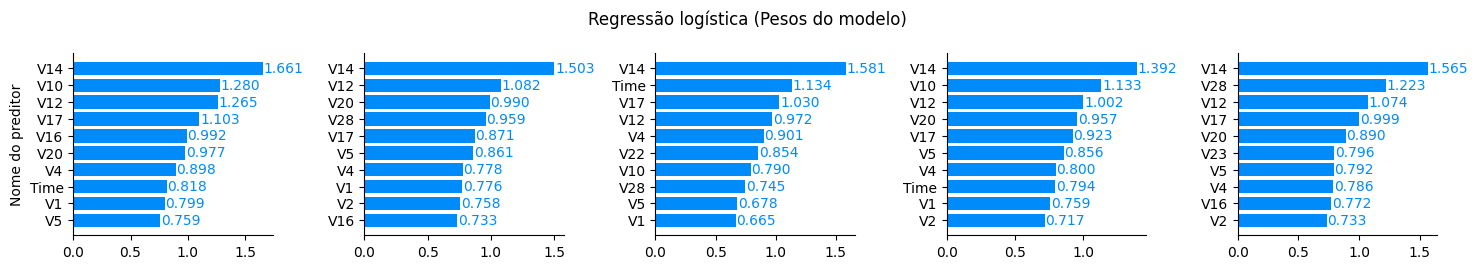

In [190]:
plot_results_logistic_regression_to_file(cross_log)

# SHAP plots

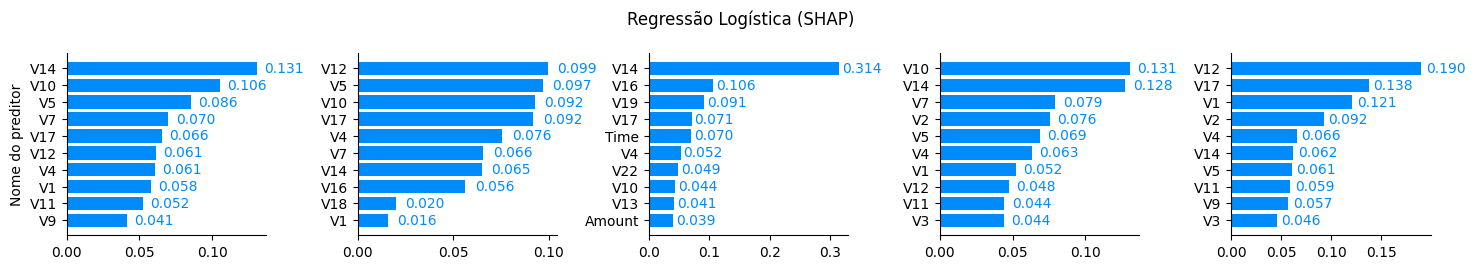

In [191]:
plot_shap_results_to_file(cross_log, "Regressão Logística (SHAP)", "kaggle_img/logistic_regression_feature_importance_plot(shap).pdf")

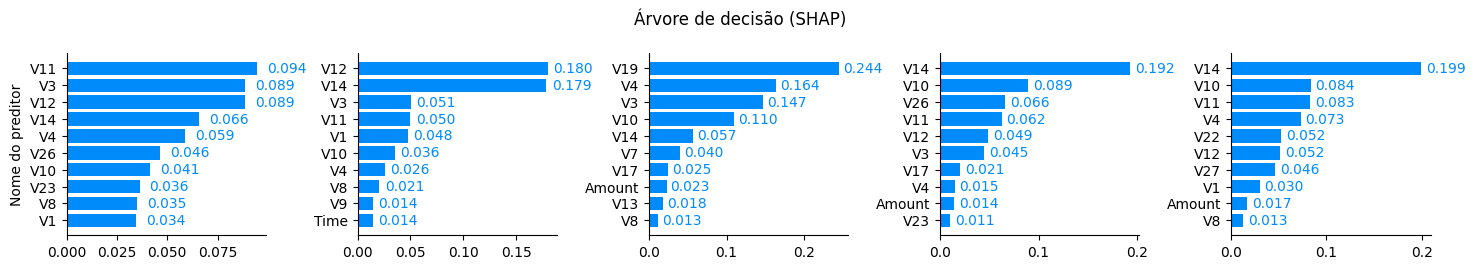

In [192]:
plot_shap_results_to_file(cross_decision_tree, "Árvore de decisão (SHAP)", "kaggle_img/decision_tree_feature_importance_plot(shap).pdf")

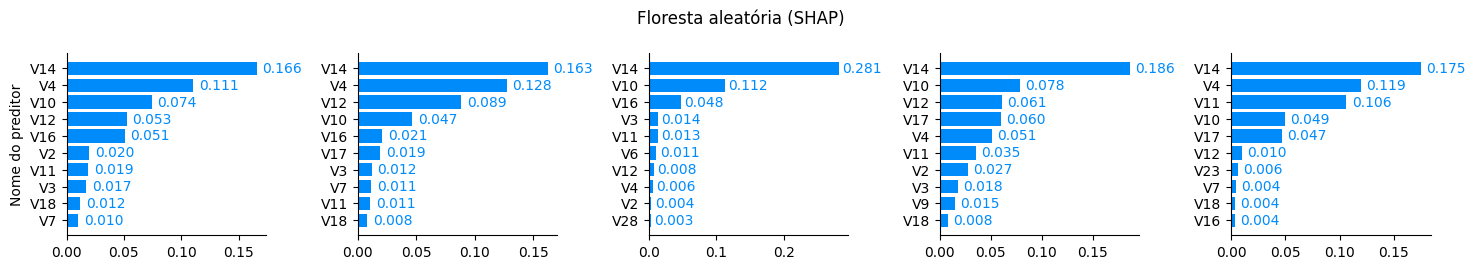

In [193]:
plot_shap_results_to_file(cross_random_fres, "Floresta aleatória (SHAP)", "kaggle_img/random_forest_feature_importance_plot(shap).pdf")

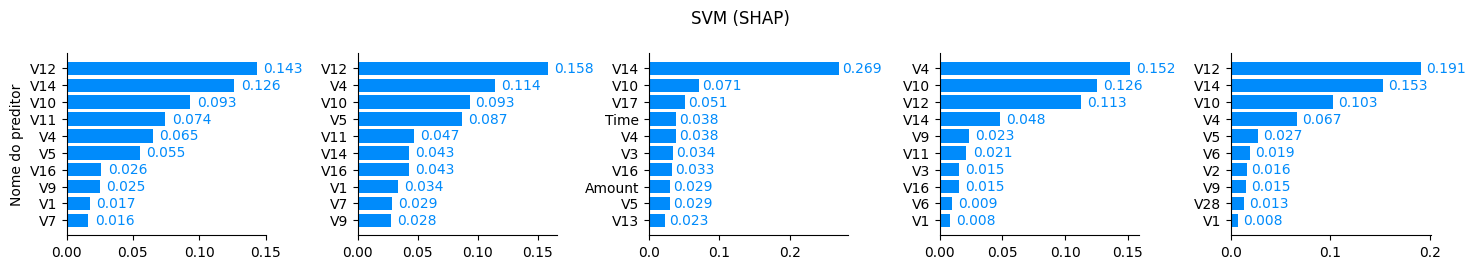

In [194]:
plot_shap_results_to_file(cross_svm, "SVM (SHAP)", "kaggle_img/svm_feature_importance_plot(shap).pdf")

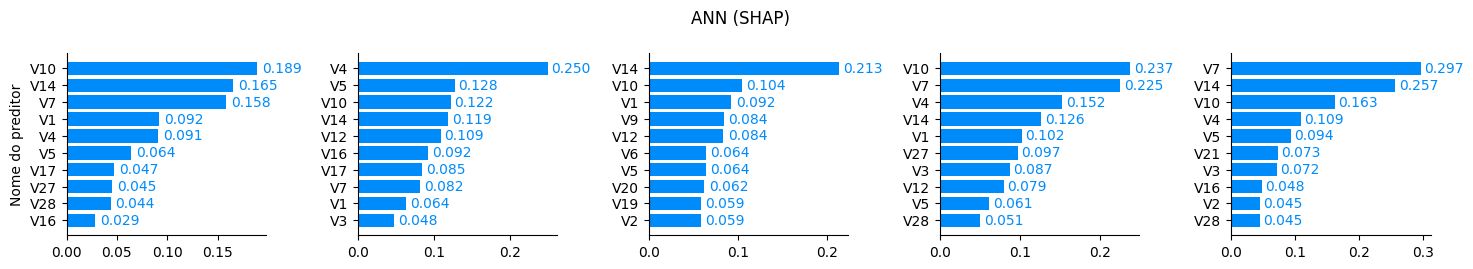

In [195]:
plot_shap_results_to_file(cross_ann, "ANN (SHAP)", "kaggle_img/ann_feature_importance_plot(shap).pdf")

# LIME plots

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


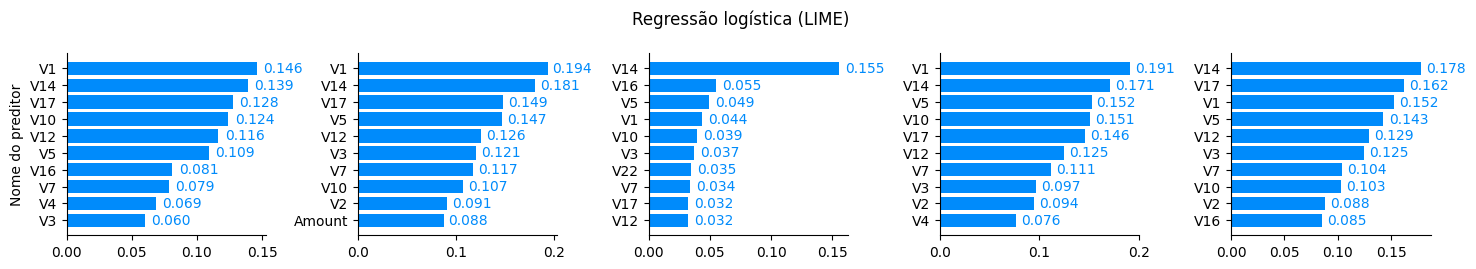

In [196]:
plot_lime_results_to_file(cross_log, "Regressão logística (LIME)", "kaggle_img/logistic_regression_feature_importance_plot(lime).pdf")

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


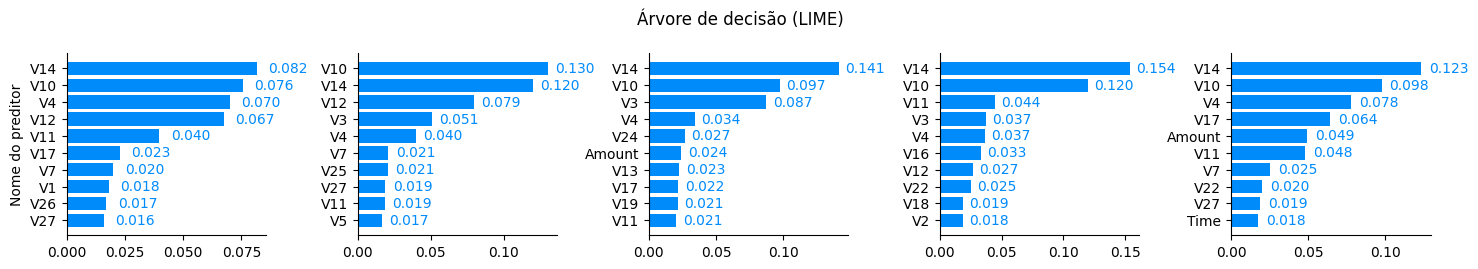

In [197]:
plot_lime_results_to_file(cross_decision_tree, "Árvore de decisão (LIME)", "kaggle_img/decision_tree_feature_importance_plot(lime).pdf")

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


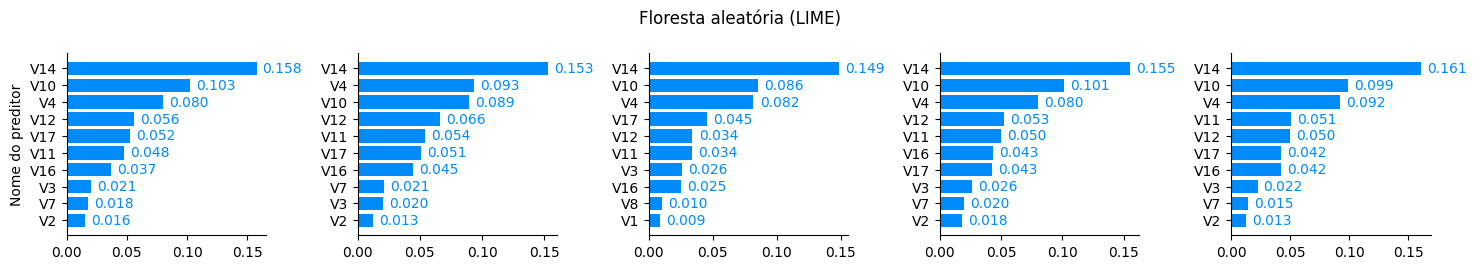

In [198]:
plot_lime_results_to_file(cross_random_fres, "Floresta aleatória (LIME)", "kaggle_img/random_forest_feature_importance_plot(lime).pdf")

X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names


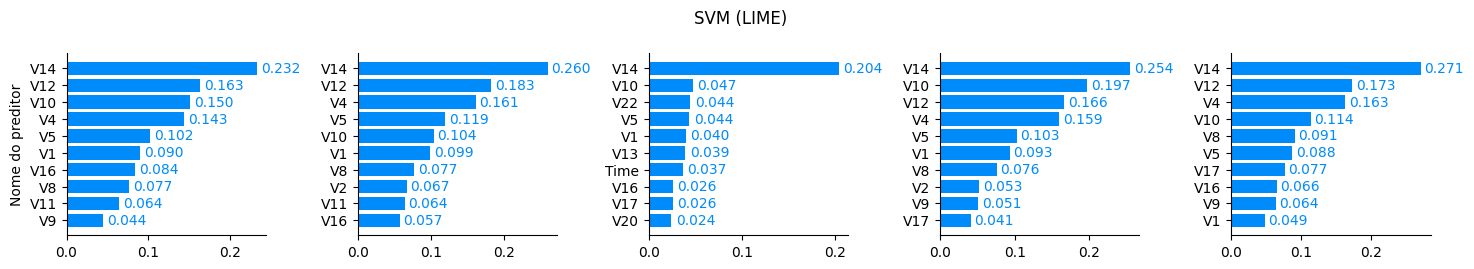

In [199]:
plot_lime_results_to_file_for_svm(cross_svm, "SVM (LIME)", "kaggle_img/svm_feature_importance_plot(lime).pdf")

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names


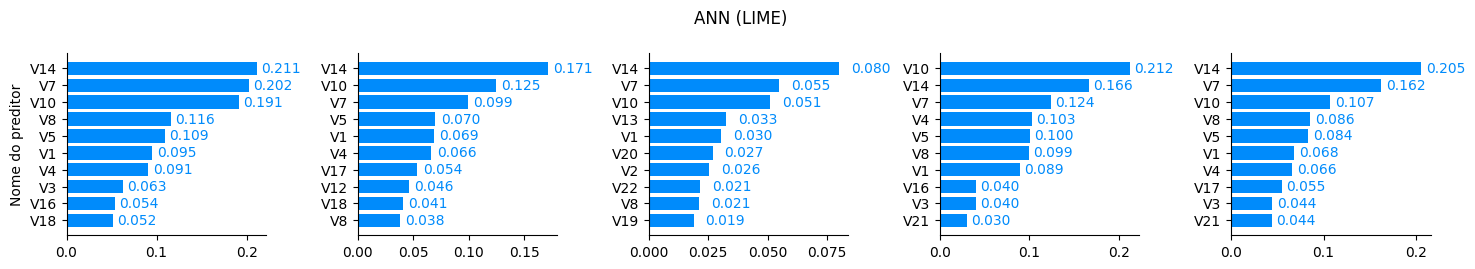

In [200]:
plot_lime_results_to_file(cross_ann, "ANN (LIME)", "kaggle_img/ann_feature_importance_plot(lime).pdf")

# Calculando número de acertos e erros

In [201]:
def compute_agreement(data_dict):
    logistic_regression_values = data_dict['logistic_regression_values']
    num_agreements = {}
    for key in ['logistic_regression_lime', 'logistic_regression_shap', 'random_forest_lime', 'random_forest_shap', 'svm_lime', 'svm_shap', 'mlp_classifier_lime', 'mlp_classifier_shap', 'decision_tree_lime', 'decision_tree_shap']:
        num_agreements[key] = [sum([1 for s in data_dict[key][i] if s in logistic_regression_values[i]]) for i in range(len(logistic_regression_values))]
    return num_agreements



In [202]:
res = compute_agreement(data_dict)
print(res)

{'logistic_regression_lime': [8, 6, 7, 8, 6], 'logistic_regression_shap': [7, 7, 6, 7, 6], 'random_forest_lime': [6, 6, 6, 6, 6], 'random_forest_shap': [5, 5, 5, 6, 6], 'svm_lime': [7, 7, 7, 8, 6], 'svm_shap': [7, 6, 6, 5, 6], 'mlp_classifier_lime': [6, 6, 4, 5, 4], 'mlp_classifier_shap': [7, 7, 5, 6, 6], 'decision_tree_lime': [6, 4, 4, 5, 3], 'decision_tree_shap': [5, 4, 4, 5, 3]}
